In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

In [19]:
# --
idxs = np.load('../data/test/ys_base.npz')['idxs'].item()
ys_base = np.load('../data/test/ys_base.npz')['ys_base']
ys = np.load('../data/test/ys.npz')['ys']

rates_base = ys_base[:, idxs['R']]
rates = ys[:, idxs['R']]

run_pars = np.load('../data/test/run_pars.npz')

times = run_pars['times']
tmax = run_pars['tmax']
stim = run_pars['stim']

pars = np.load('../data/test/pars.npz')

pops = pars['pops']
conns = pars['conns']
codes = pars['codes'].item()

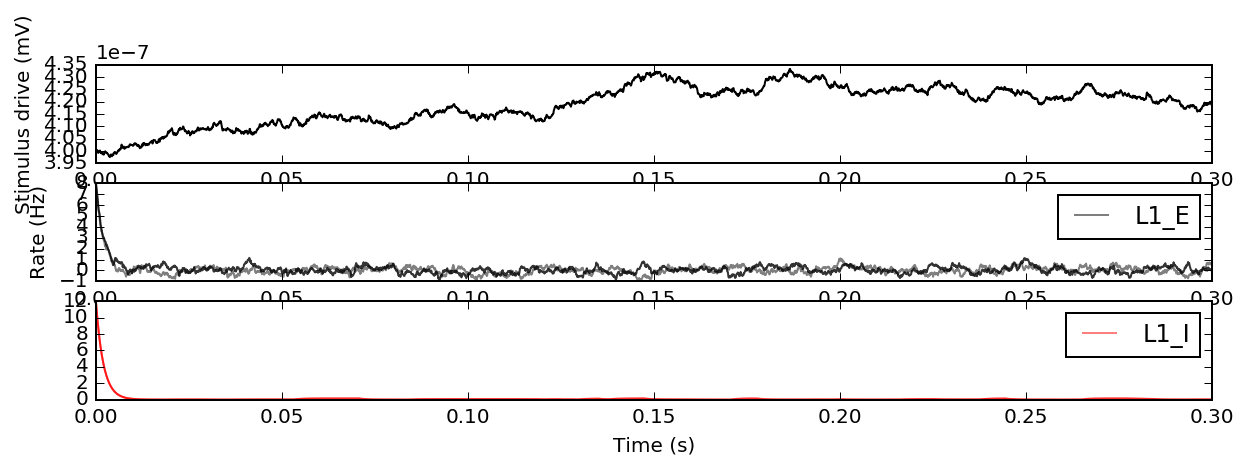

In [18]:
plt.figure(figsize=(10, 3))
nplot = len(pops) + 1

n = 1
plt.subplot(nplot, 1, n)
plt.plot(times, stim, label='Stimulus', color='k')
plt.ylabel("Stimulus drive (mV)")

for pop, pars in pops:
    c_pop = 'k'
    if pars['type'] == 'I':
        c_pop = 'r'
    
    n += 1
    plt.subplot(nplot, 1, n)
    plt.plot(times, rates_base[:, codes[pop]], color=c_pop, alpha=0.5, label=pop)
    plt.plot(times, rates[:, codes[pop]], color=c_pop, alpha=0.8)
    plt.xlim(0, tmax)
    if n == 2:
        plt.ylabel("Rate (Hz)")
    plt.legend()
#     plt.ylim(0, 200)

plt.xlabel("Time (s)")

In [14]:
pars['W'].size

361